This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [7]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy
import scipy.optimize as optimization

In [8]:
# Graphics
%matplotlib notebook

In [9]:
# Here's a Weibull function
def pWeibull(r, sigma, eta):
    ''' Weibull function '''
    from numpy import exp
    mu = 1-r
    ret = 2*eta/sigma**2/mu**3 * \
        (((mu**(-2)-1)/sigma**2)**(eta-1)) * \
        exp(-((mu**(-2)-1)/sigma**2)**eta)
    return ret

In [10]:
def func(r, sigma1, sigma2):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (pdf1 + pdf2)/2

<IPython.core.display.Javascript object>


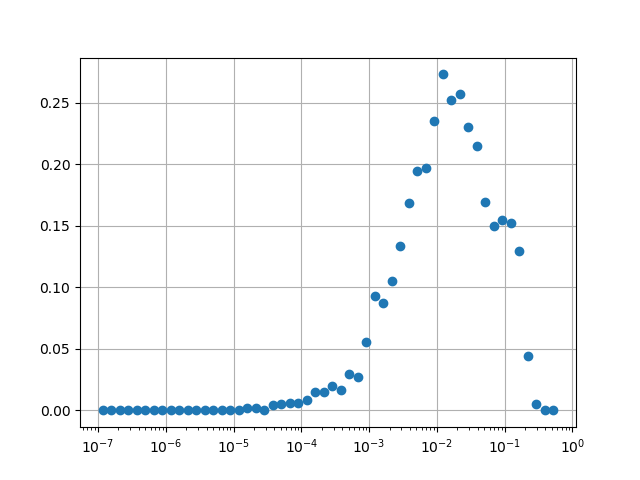

0.9999999999999999


In [14]:
#TRYING THE BIMODAL FIT WITH A WEIGHTED VARIABLE
#practice to fitting points to a Weibull function
# r = np.geomspace(1e-6,.99,40)
# pdf1 = pWeibull(r,0.2,1.0)*r
# pdf2 = pWeibull(r,0.7,1.0)*r
# N= 0.8
# y = (1-N)*pdf1+pdf2*N

dummy= np.loadtxt('roughness.txt')
r= dummy[0,:]
y= dummy[1,:]

#plot scattered points
plt.figure()
plt.semilogx(r,y,'o')
plt.grid(True)

#check for normalization 
norm = -np.trapz(np.log(r),y); print(norm)

In [15]:
def func(r, sigma1, sigma2, N):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (1-N)*pdf1 + N*pdf2 

In [16]:
x0 = np.array([0.5,0.8, 0.1])
solution, solutionerror = optimization.curve_fit(func, r, y, x0)
best_sigma1 = solution[0]; print(best_sigma1)
best_sigma2 = solution[1]; print(best_sigma2)
best_N = solution[2]; print(best_N)

0.1548431134046124
0.42603915689006555
0.40070187099644067


<IPython.core.display.Javascript object>


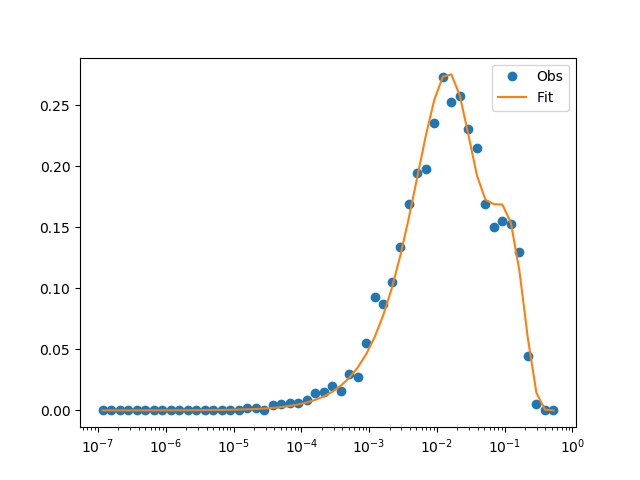

In [17]:
# Testing our found sigma value with an eta of 1.0
plt.figure()
plt.semilogx(r,y,'o',label='Obs')
plt.semilogx(r,func(r, best_sigma1, best_sigma2, best_N), label='Fit')
plt.legend()

In [22]:
best_zsquar1= best_sigma1**2
best_zsquar2= best_sigma2**2
r1= 0.5*best_zsquar1; print("r1 ",r1)
r2= 0.5*best_zsquar2; print("r2 ",r2)
cost1=1-r1
cost2=1-r2
t1=np.arccos(cost1)*180/np.pi; print("t1", t1)
t2=np.arccos(cost2)*180/np.pi; print('t2', t2)

r1  0.011988194884416829
r2  0.09075468160179895
t1 8.880744006414062
t2 24.598732418812535
